# SVM USING GAUSSIAN RBF KERNEL

**Nhóm thực hiện:**

- 1712364 - Bùi Chí Dũng

- 1712584 - Nguyễn Công Lý

In [1]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import time

In [2]:
def read_mnist(mnist_file):
    """
    Reads MNIST data.
    
    Parameters
    ----------
    mnist_file : string
        The name of the MNIST file (e.g., 'mnist.pkl.gz').
    
    Returns
    -------
    (train_X, train_Y, val_X, val_Y, test_X, test_Y) : tuple
        train_X : numpy array, shape (N=50000, d=784)
            Input vectors of the training set.
        train_Y: numpy array, shape (N=50000)
            Outputs of the training set.
        val_X : numpy array, shape (N=10000, d=784)
            Input vectors of the validation set.
        val_Y: numpy array, shape (N=10000)
            Outputs of the validation set.
        test_X : numpy array, shape (N=10000, d=784)
            Input vectors of the test set.
        test_Y: numpy array, shape (N=10000)
            Outputs of the test set.
    """
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

# Read data from 'mnist.pkl.gz'
train_X, train_Y, val_X, val_Y, test_X, test_Y = read_mnist('mnist.pkl.gz')

### Giá trị C và gamma:
C = [0.1, 1, 10]

gamma = [0.001, 0.01, 0.1]

In [5]:
# Các giá trị tham số C và gamma được đưa vào mảng
C = [0.1, 1, 10]
g = [0.001, 0.01, 0.1]

# Khởi tạo mảng độ lỗi
E_train_rbf = []
E_val_rbf = []

for i in C:
    for j in g:
        print("Với C = ", i)
        print("Với gamma = ", j)
        clf = svm.SVC(C = i, kernel = 'rbf', gamma = j)

        #fit the model
        start_time = time.time()
        clf.fit(train_X, train_Y)
        print("Total time: %s seconds" % (time.time() - start_time))

        #Get the error value
        E_train_c_g = 1 - clf.score(train_X, train_Y)
        E_val_c_g = 1 - clf.score(val_X, val_Y)
        
        #Lưu lại đồ lỗi vào mảng đã khởi tạo
        E_train_rbf.append(E_train_c_g)
        E_val_rbf.append(E_val_c_g)
        
        print("Độ lỗi trên tập training: ", E_train_c_g)
        print("Độ lỗi trên tập validation: ", E_val_c_g)

Với C =  0.1
Với gamma =  0.001
Total time: 1529.9412128925323 seconds
Độ lỗi trên tập training:  0.09824
Độ lỗi trên tập validation:  0.08609999999999995
Với C =  0.1
Với gamma =  0.01
Total time: 702.927503824234 seconds
Độ lỗi trên tập training:  0.04701999999999995
Độ lỗi trên tập validation:  0.042200000000000015
Với C =  0.1
Với gamma =  0.1
Total time: 3620.643173456192 seconds
Độ lỗi trên tập training:  0.28952
Độ lỗi trên tập validation:  0.3125
Với C =  1
Với gamma =  0.001
Total time: 551.3761706352234 seconds
Độ lỗi trên tập training:  0.06422000000000005
Độ lỗi trên tập validation:  0.05889999999999995
Với C =  1
Với gamma =  0.01
Total time: 314.2866096496582 seconds
Độ lỗi trên tập training:  0.015260000000000051
Độ lỗi trên tập validation:  0.022299999999999986
Với C =  1
Với gamma =  0.1
Total time: 5576.588743448257 seconds
Độ lỗi trên tập training:  4.0000000000040004e-05
Độ lỗi trên tập validation:  0.04479999999999995
Với C =  10
Với gamma =  0.001
Total time: 323.

## Đánh giá RBF Kernel

**RBF SVM parameters**
- The **gamma** parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values mearning 'close'. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
- The **C** parameter trades off correct classification of training examples against maximization of the decision function's margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function at the cost of training accuracy. **In other words C behaves as a regularization parameter in the SVM.**

## Kết quả:

- Với C =  0.1, gamma =  0.001

Total time: 1529.9412128925323 seconds

Độ lỗi trên tập training:  0.09824

Độ lỗi trên tập validation:  0.08609999999999995

- Với C =  0.1, gamma =  0.01

Total time: 702.927503824234 seconds

Độ lỗi trên tập training:  0.04701999999999995

Độ lỗi trên tập validation:  0.042200000000000015

- Với C =  0.1, gamma =  0.1

Total time: 3620.643173456192 seconds

Độ lỗi trên tập training:  0.28952

Độ lỗi trên tập validation:  0.3125

- Với C =  1, gamma =  0.001

Total time: 551.3761706352234 seconds

Độ lỗi trên tập training:  0.06422000000000005

Độ lỗi trên tập validation:  0.05889999999999995

- Với C =  1, gamma =  0.01

Total time: 314.2866096496582 seconds

Độ lỗi trên tập training:  0.015260000000000051

Độ lỗi trên tập validation:  0.022299999999999986

- Với C =  1, gamma =  0.1

Total time: 5576.588743448257 seconds

Độ lỗi trên tập training:  4.0000000000040004e-05

Độ lỗi trên tập validation:  0.04479999999999995

- Với C =  10, gamma =  0.001

Total time: 323.1787791252136 seconds

Độ lỗi trên tập training:  0.037939999999999974

Độ lỗi trên tập validation:  0.04079999999999995

**- Với C =  10, gamma =  0.01**

**Total time: 257.4736008644104 seconds**

**Độ lỗi trên tập training:  0.0005800000000000249**

**Độ lỗi trên tập validation:  0.01649999999999996**

- Với C =  10, gamma =  0.1

Total time: 5556.750864505768 seconds

Độ lỗi trên tập training:  0.0

Độ lỗi trên tập validation:  0.043399999999999994

## Biểu đồ sự thay đổi độ chính xác trên tập train và tập test theo C và Gamma

In [ ]:
C = [0.1, 1, 10] #c0 c1 c2
g = [0.001, 0.01, 0.1] #g0 g1 g2

In [8]:
# mảng tỉ lệ lỗi trên tập training
E_train_rbf

[0.09824,
 0.04701999999999995,
 0.28952,
 0.06422000000000005,
 0.015260000000000051,
 4.0000000000040004e-05,
 0.037939999999999974,
 0.0005800000000000249,
 0.0]

In [9]:
# mảng tỉ lệ lỗi trên tập validation
E_val_rbf

[0.08609999999999995,
 0.042200000000000015,
 0.3125,
 0.05889999999999995,
 0.022299999999999986,
 0.04479999999999995,
 0.04079999999999995,
 0.01649999999999996,
 0.043399999999999994]

Tính giá trị Accuracy từ các mảng độ lỗi E_train_rbf và E_val_rbf

In [11]:
# Khai báo mảng độ chính xác trên tập training và tập validation
A_train_rbf = []
A_val_rbf = []

#Chuyển đổi mảng độ lỗi thành mảng độ chính xác
for i in E_train_rbf:
    A_train_rbf.append(1-i)
for j in E_val_rbf:
    A_val_rbf.append(1-j)

In [13]:
# Mảng độ chính xác trên tập training
A_train_rbf = [0.90176, 0.95298, 0.71048, 0.93578, 0.98474, 0.99996, 0.96206, 0.99942, 1.0]

[0.90176, 0.95298, 0.71048, 0.93578, 0.98474, 0.99996, 0.96206, 0.99942, 1.0]

In [14]:
#Mảng độ chính xác trên tập validation 
A_val_rbf = [0.9139, 0.9578, 0.6875, 0.9411, 0.9777, 0.9552, 0.9592, 0.9835, 0.9566]

[0.9139, 0.9578, 0.6875, 0.9411, 0.9777, 0.9552, 0.9592, 0.9835, 0.9566]

### Biểu đồ khi thay đổi C

C = [0.1, 1, 10] #c0 c1 c2
g = [0.001, 0.01, 0.1] #g0 g1 g2

A_train_rbf = [c0g0, c0g1, c0g2, c1g0, c1g1, c1g2, c2g0, c2g1, c2g2]
A_val_rbf = [c0g0, c0g1, c0g2, c1g0, c1g1, c1g2, c2g0, c2g1, c2g2]

In [22]:
#Biểu đồ thay đổi theo C:

# Mảng các giá trị siêu tham số C
C = [0.1, 1, 10]

# Mảng độ chính xác thay đổi theo C tại g = 0.001
A_train_g0001 = [A_train_rbf[0], A_train_rbf[3], A_train_rbf[6]]
A_val_g0001 = [A_val_rbf[0], A_val_rbf[3], A_val_rbf[6]]

# Mảng độ chính xác thay đổi theo C tại g = 0.01
A_train_g001 = [A_train_rbf[1], A_train_rbf[4], A_train_rbf[7]] 
A_val_g001 = [A_val_rbf[1], A_val_rbf[4], A_val_rbf[7]] 

# Mảng độ chính xác thay đổi theo C tại g = 0.1
A_train_g01 = [A_train_rbf[2], A_train_rbf[5], A_train_rbf[8]]
A_val_g01 = [A_val_rbf[2], A_val_rbf[5], A_val_rbf[8]]

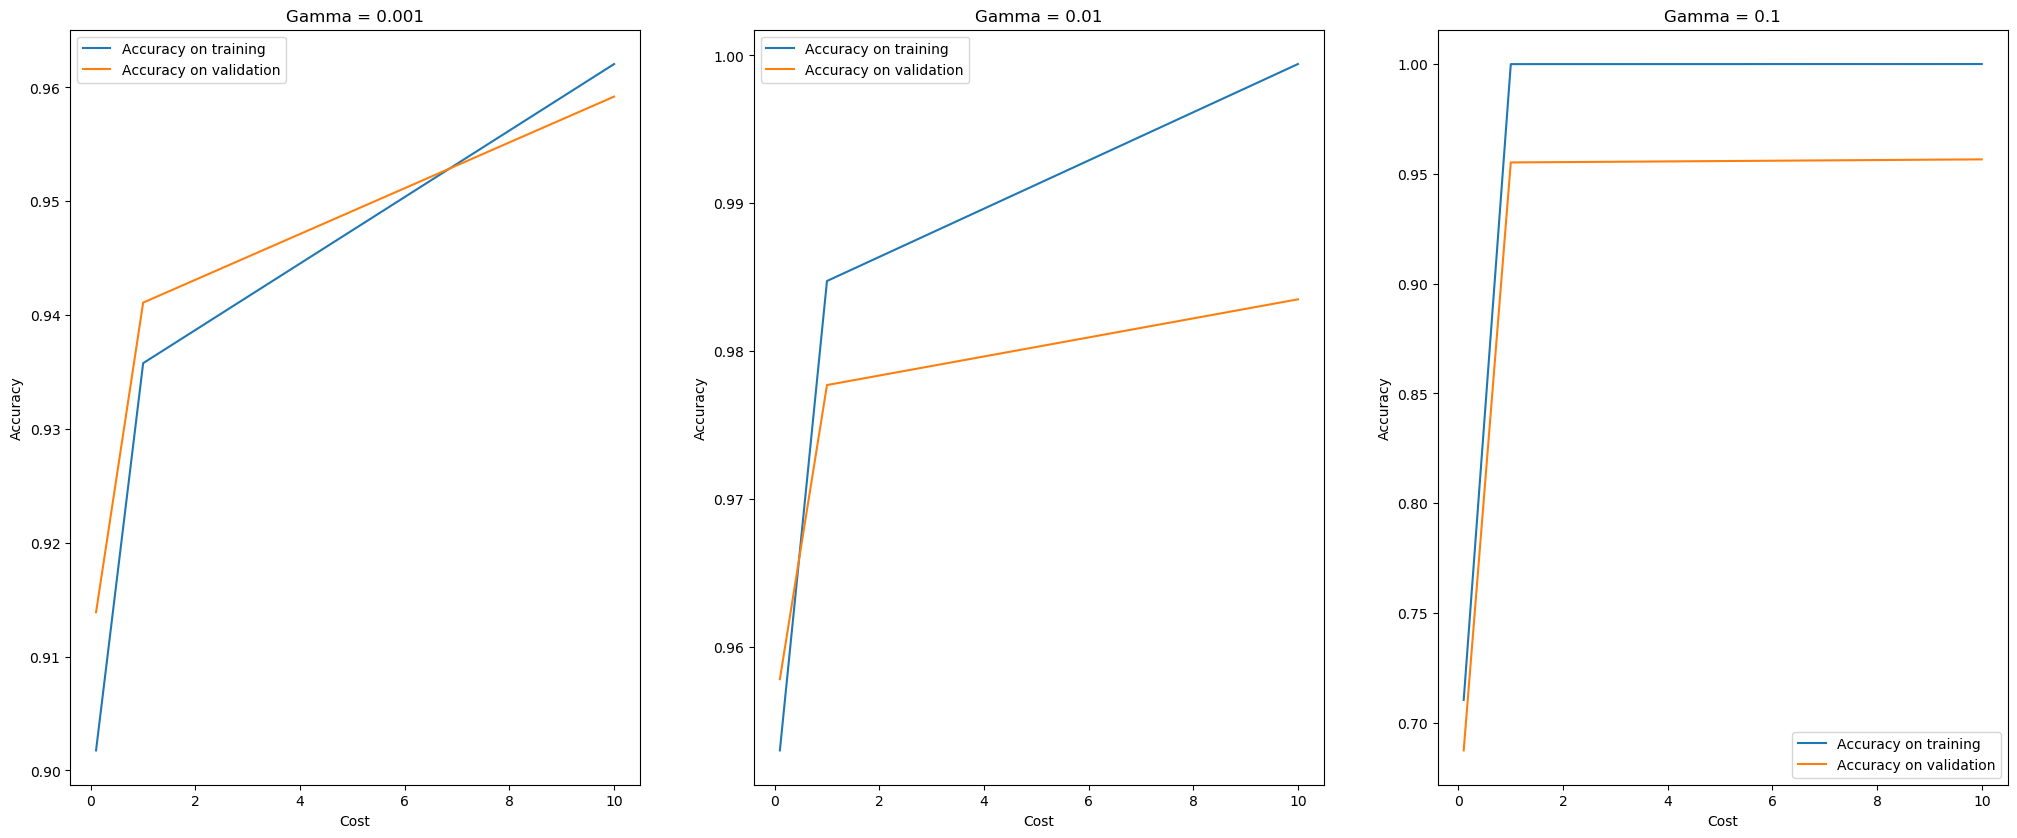

In [23]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), dpi = 100)

ax1.plot(C, A_train_g0001, label = 'Accuracy on training')
ax1.plot(C, A_val_g0001, label = 'Accuracy on validation')
ax1.set_xlabel('Cost')
ax1.set_ylabel('Accuracy')
ax1.set_title("Gamma = 0.001")
ax1.legend(loc = 'best')

ax2.plot(C, A_train_g001, label = 'Accuracy on training')
ax2.plot(C, A_val_g001, label = 'Accuracy on validation')
ax2.set_xlabel('Cost')
ax2.set_ylabel('Accuracy')
ax2.set_title("Gamma = 0.01")
ax2.legend(loc = 'best')

ax3.plot(C, A_train_g01, label = 'Accuracy on training')
ax3.plot(C, A_val_g01, label = 'Accuracy on validation')
ax3.set_xlabel('Cost')
ax3.set_ylabel('Accuracy')
ax3.set_title("Gamma = 0.1")
ax3.legend(loc = 'best')

plt.show()

### Biểu đồ khi thay đổi Gamma

In [24]:
g = [0.001, 0.01, 0.1]
# Mảng độ chính xác thay đổi theo gamma tại c = 0.1
A_train_c01 = [A_train_rbf[0], A_train_rbf[1], A_train_rbf[2]]
A_val_c01 = [A_val_rbf[0], A_val_rbf[1], A_val_rbf[2]]

# Mảng độ chính xác thay đổi theo gamma tại c = 1
A_train_c1 = [A_train_rbf[3], A_train_rbf[4], A_train_rbf[5]] 
A_val_c1 = [A_val_rbf[3], A_val_rbf[4], A_val_rbf[5]] 

# Mảng độ chính xác thay đổi theo gamma tại c = 10
A_train_c10 = [A_train_rbf[6], A_train_rbf[7], A_train_rbf[8]]
A_val_c10 = [A_val_rbf[6], A_val_rbf[7], A_val_rbf[8]]

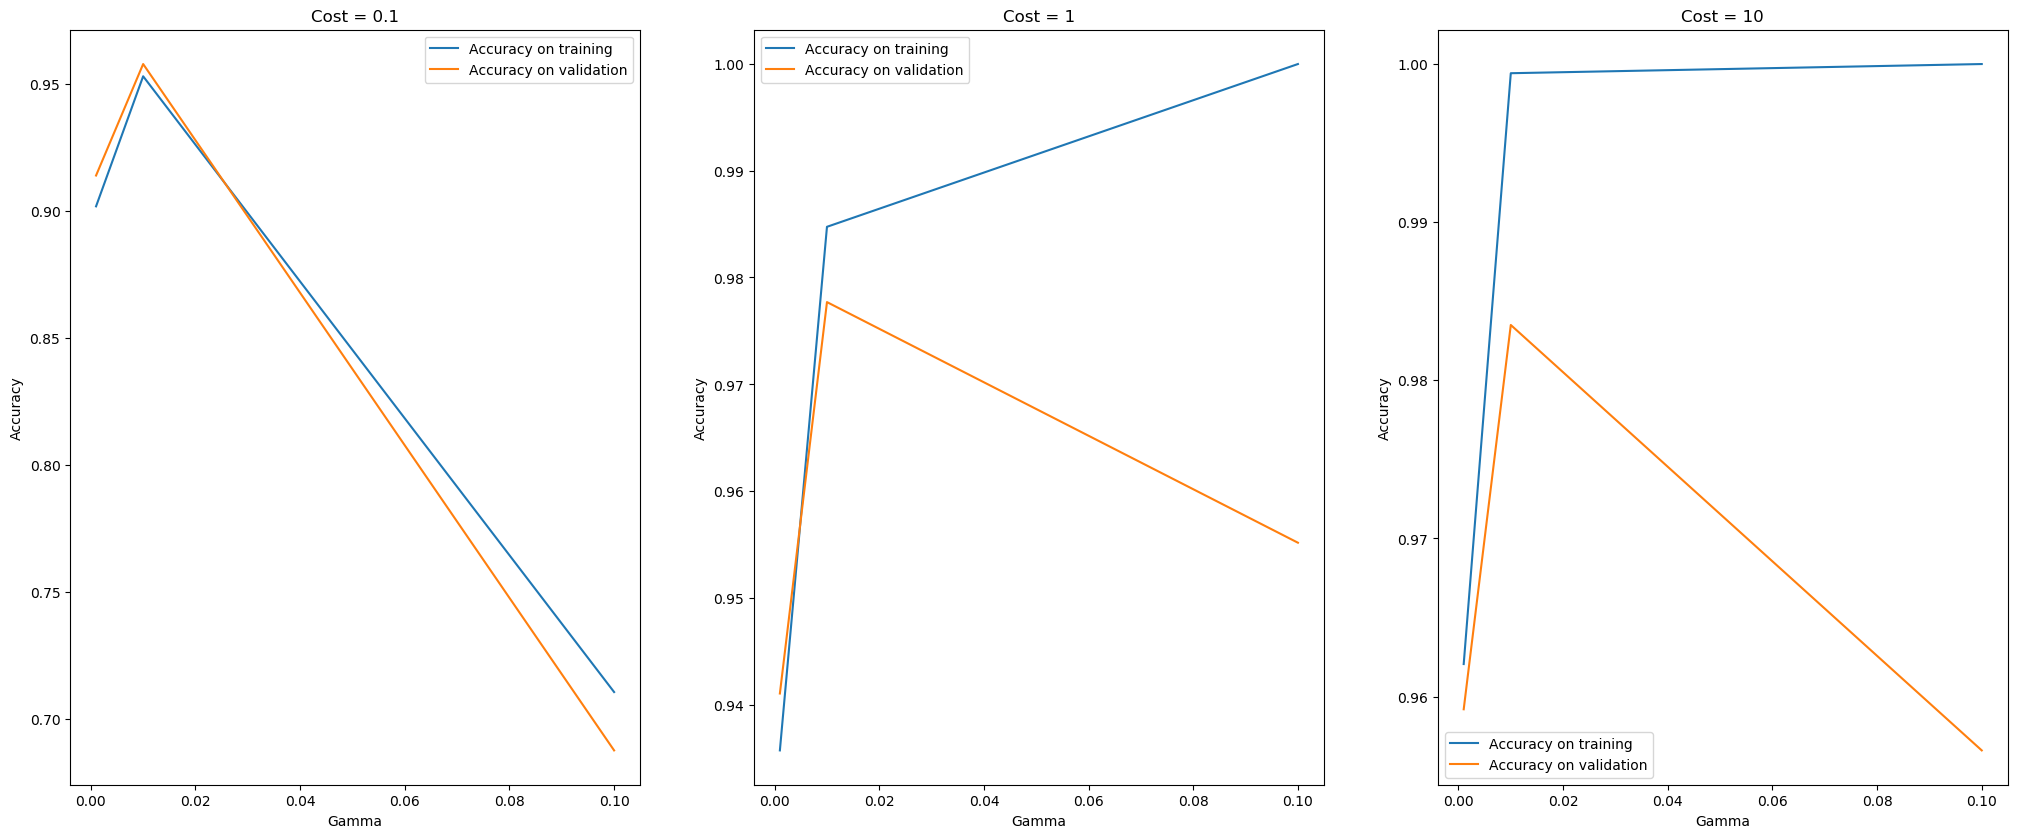

In [26]:
import matplotlib.pyplot as plt

# Vẽ 3 đồ thị cùng lúc, tương ứng với ax1, ax2, ax3
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (25,10), dpi = 100)

# Đồ thị sự thay đổi độ chính xác theo gamma tại c = 0.1 
ax1.plot(g, A_train_c01, label = 'Accuracy on training')
ax1.plot(g, A_val_c01, label = 'Accuracy on validation')
ax1.set_xlabel('Gamma')
ax1.set_ylabel('Accuracy')
ax1.set_title("Cost = 0.1")
ax1.legend(loc = 'best')

# Đồ thị sự thay đổi độ chính xác theo gamma tại c = 1
ax2.plot(g, A_train_c1, label = 'Accuracy on training')
ax2.plot(g, A_val_c1, label = 'Accuracy on validation')
ax2.set_xlabel('Gamma')
ax2.set_ylabel('Accuracy')
ax2.set_title("Cost = 1")
ax2.legend(loc = 'best')

# Đồ thị sự thay đổi độ chính xác theo gamma tại c = 10
ax3.plot(g, A_train_c10, label = 'Accuracy on training')
ax3.plot(g, A_val_c10, label = 'Accuracy on validation')
ax3.set_xlabel('Gamma')
ax3.set_ylabel('Accuracy')
ax3.set_title("Cost = 10")
ax3.legend(loc = 'best')

plt.show()

In [3]:
# Train dữ liệu với c_best và gamma_best đã chọn từ những kết quả ở các giá trị C và gamma bên trên.
#Tính độ lỗi trên tập test.

c_best = 10
gamma_best = 0.01 

#Apply SVM RBF Kernel with C = c_best and gamma = 0.01
clf = svm.SVC(C = c_best, kernel = 'rbf', gamma = gamma_best)

#fit the model
start_time = time.time()
clf.fit(train_X, train_Y)
print("Total time: %s seconds" % (time.time() - start_time))

#Get the error value
print("Độ lỗi trên tập test: ", 1 - clf.score(test_X, test_Y))

Total time: 292.7025308609009 seconds
Độ lỗi trên tập test:  0.018000000000000016


In [4]:
# Lưu model đã train với c_best và gamma_best ra file 'mnist-rbf-svm.joblib'
from joblib import dump, load
dump(clf, 'mnist-rbf-svm.joblib')

['mnist-rbf-svm.joblib']

Classification report for classifier SVC(C=10, gamma=0.01):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000




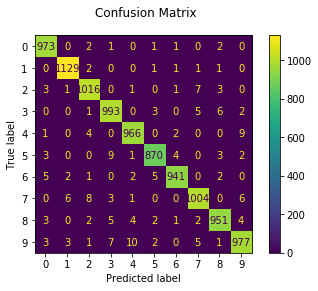

In [28]:
# Độ chính xác của hàm dự đoán
#PREDICT
predict = clf.predict(test_X)

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(test_Y, predict)))
disp = metrics.plot_confusion_matrix(clf, test_X, test_Y)
disp.figure_.suptitle("Confusion Matrix")
#print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

Với C = 10 và gamma = 0.01

Total time: 268.44721126556396 seconds

Độ lỗi trên tập test:  0.018000000000000016